In [3]:
#import torch
#import torch.nn.functional as F
#from sklearn.model_selection import KFold
import numpy as np
import copy

import os
import sys
import pathlib
pth=str(pathlib.Path().absolute())

#Utilities
sys.path.append(pth)
#from model_An import *
#from util import *
#from Data_loader_image import *

#Base de datos
#sys.path.append()
#data=("/").join(pth.split("/")[:-2])+"/Data_Base/Metada_V6G_p1"
data=("/").join(pth.split("/")[:-2])+"/Data_Base/Metadata_V7G_pytorch"
data_arg=("/").join(pth.split("/")[:-2])+"/Data_Base"


In [2]:
#dataset=Rotated_Dataset(data_arg,"Metadata_V6G_p1")
dataset=Rotated_Dataset(data_arg,"Metadata_V7G_pytorch",
                        features=[
                            12,
                            13,
                            15,
                            16,
                            -5,
                            -4,
                            -3,
                            -2,
                            -1,
                        ],
                        range=[10,13]
                       )

In [3]:
np.sort(np.unique(dataset.landmarks_frame[:,1].astype(float)))

array([10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11. , 11.1,
       11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. , 12.1, 12.2,
       12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9])

[ 8.3  8.9  9.4  9.6  9.7  9.8  9.9 10.  10.1 10.2 10.3 10.4 10.5 10.6
 10.7 10.8 10.9 11.  11.1 11.2 11.3 11.4 11.5 11.6 11.7 11.8 11.9 12.
 12.1 12.2 12.3 12.4 12.5 12.6 12.7 12.8 12.9 13.  13.1 13.2 13.3 13.4
 13.5 13.6 13.7 13.8 13.9 14.  14.1 14.2 14.3 14.4 14.5 14.6 14.7 14.9]
[ 16  16  48  24  16   8  64  56  48  32  32  41  64  56 112  72 104  80
 152 216 152 128 184 184 168 232 224 136 264 272 136 176 224 272 152 248
 280 176 224 152  96 112  88  56 112  64 112  64  24  32  32  24  32  16
  32  16]


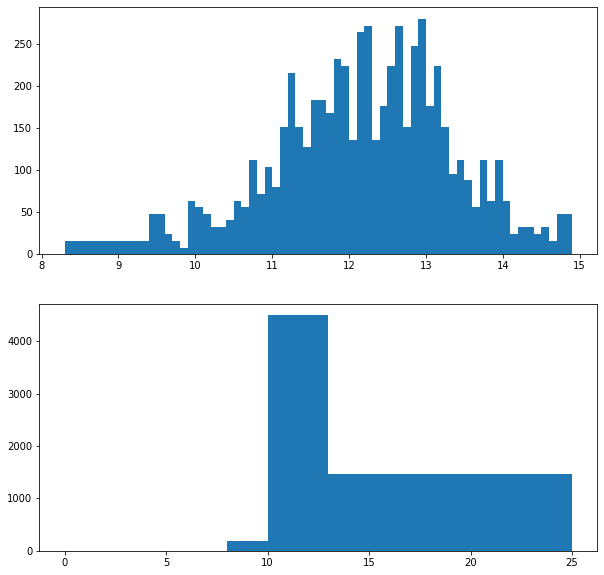

In [27]:
Yc=np.sort(np.unique(Y.astype(float)))
np.sum(Y.astype(float)==Yc[0])
Yd=np.vectorize(lambda Y,Yc:np.sum(Y.astype(float)==Yc),signature="(j),()->()")(Y,Yc)
print(Yc)
print(Yd)

import matplotlib.pyplot as plt
fig,axs=plt.subplots(2,1,figsize=(10,10))
axs[0].hist(Y.astype(float),Yc)
axs[1].hist(Y.astype(float),[0,6,8,10,13,25])
plt.show()

In [67]:
set([0,1,2,3,4,5]).substract([0,5])

AttributeError: 'set' object has no attribute 'substract'

In [3]:
np.unique(dataset.landmarks_frame[:,1])

array(['10.0', '10.1', '10.2', '10.3', '10.4', '10.5', '10.6', '10.7',
       '10.8', '10.9', '11.0', '11.1', '11.2', '11.3', '11.4', '11.5',
       '11.6', '11.7', '11.8', '11.9', '12.0', '12.1', '12.2', '12.3',
       '12.4', '12.5', '12.6', '12.7', '12.8', '12.9', '13.0', '13.1',
       '13.2', '13.3', '13.4', '13.5', '13.6', '13.7', '13.8', '13.9',
       '14.0', '14.1', '14.2', '14.3', '14.4', '14.5', '14.6', '14.7',
       '14.9', '8.3', '8.9', '9.4', '9.6', '9.7', '9.8', '9.9'],
      dtype='<U23')

In [1]:
ls

 El volumen de la unidad D es Data
 El n£mero de serie del volumen es: 9CC8-6E96

 Directorio de D:\Documentos\LIIARPI\Anemia\GH\LIIARPI_1\SLIC_GAT

06/11/2021  07:56    <DIR>          .
06/11/2021  07:56    <DIR>          ..
12/08/2021  21:53    <DIR>          .ipynb_checkpoints
05/11/2021  08:22    <DIR>          __pycache__
30/08/2021  09:13           580,781 best0.pt
30/08/2021  09:13           580,781 best1.pt
30/08/2021  09:13           580,781 best2.pt
30/08/2021  09:13           580,781 best3.pt
30/08/2021  09:13           580,781 best4.pt
30/08/2021  09:13            80,373 best5.pt
30/08/2021  09:13            80,373 best6.pt
30/08/2021  09:13            80,373 best7.pt
30/08/2021  09:13            80,373 best8.pt
30/08/2021  09:13            80,373 best9.pt
21/10/2021  21:46            12,866 Data_loader_image.py
07/08/2021  21:39             2,151 Data_loader_meta.py
30/08/2021  09:13    <DIR>          hh_n_0
30/08/2021  09:13            33,553 last_results.npy
30/08/2021  

In [4]:
os.listdir()
res_dir="MMhh_SelFR_v8_4Cl"

lr=np.load(os.path.join(pth,res_dir,'last_results_10f_unsampled_hh.npy'),allow_pickle=True)

lra=np.load(os.path.join(pth,res_dir,'last_results_abs_10f_unsampled_hh.npy'),allow_pickle=True)

lTP=np.load(os.path.join(pth,res_dir,'last_results_TP_10f_unsampled_hh.npy'),allow_pickle=True)
lTN=np.load(os.path.join(pth,res_dir,'last_results_TN_10f_unsampled_hh.npy'),allow_pickle=True)
lFN=np.load(os.path.join(pth,res_dir,'last_results_FN_10f_unsampled_hh.npy'),allow_pickle=True)
lFP=np.load(os.path.join(pth,res_dir,'last_results_FP_10f_unsampled_hh.npy'),allow_pickle=True)

In [5]:
v_a=np.vectorize(lambda d,i:np.array(d[i]["valid_acc"]),signature="(),()->(j)")(lr.reshape(1,)[0],
                                                     np.array(list(lr.reshape(1,)[0].keys())))
t_a=np.vectorize(lambda d,i:np.array(d[i]["train_loss"]),signature="(),()->(j)")(lr.reshape(1,)[0],
                                                     np.array(list(lr.reshape(1,)[0].keys())))

vv_a=np.vstack((np.max(v_a,axis=0),
                np.min(v_a,axis=0),
                np.mean(v_a,axis=0),
                np.mean(v_a,axis=0)+np.std(v_a,axis=0),
                np.mean(v_a,axis=0)-np.std(v_a,axis=0)
               ))
tt_a=np.vstack((np.max(t_a,axis=0),
                np.min(t_a,axis=0),
                np.mean(t_a,axis=0),
                np.mean(t_a,axis=0)+np.std(t_a,axis=0),
                np.mean(t_a,axis=0)-np.std(t_a,axis=0)
              ))


v_a=np.vectorize(lambda d,i:np.array(d[i]["valid_acc_abs"]),signature="(),()->(j)")(lra.reshape(1,)[0],
                                                     np.array(list(lra.reshape(1,)[0].keys())))
t_a=np.vectorize(lambda d,i:np.array(d[i]["train_acc_abs"]),signature="(),()->(j)")(lra.reshape(1,)[0],
                                                     np.array(list(lra.reshape(1,)[0].keys())))

vv_aa=np.vstack((np.max(v_a,axis=0),
                np.min(v_a,axis=0),
                np.mean(v_a,axis=0),
                np.mean(v_a,axis=0)+np.std(v_a,axis=0),
                np.mean(v_a,axis=0)-np.std(v_a,axis=0)
               ))
tt_aa=np.vstack((np.max(t_a,axis=0),
                np.min(t_a,axis=0),
                np.mean(t_a,axis=0),
                np.mean(t_a,axis=0)+np.std(t_a,axis=0),
                np.mean(t_a,axis=0)-np.std(t_a,axis=0)
              ))

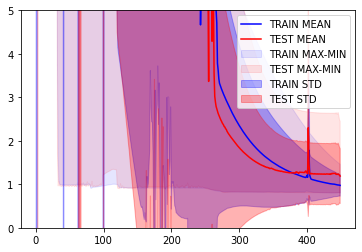

In [10]:

import matplotlib.pyplot as plt
    
init=0
plt.fill_between(x=np.arange(tt_a[1][init:].shape[0]),y1=tt_a[1][init:],y2=tt_a[0][init:],color='b',alpha=0.1, label = "TRAIN MAX-MIN")
plt.fill_between(x=np.arange(tt_a[1][init:].shape[0]),y1=vv_a[1][init:],y2=vv_a[0][init:],color='r',alpha=0.1, label = "TEST MAX-MIN")

plt.fill_between(x=np.arange(tt_a[1][init:].shape[0]),y1=tt_a[3][init:],y2=tt_a[4][init:],color='b',alpha=0.3, label = "TRAIN STD")
plt.fill_between(x=np.arange(tt_a[1][init:].shape[0]),y1=vv_a[3][init:],y2=vv_a[4][init:],color='r',alpha=0.3, label = "TEST STD")

plt.plot(tt_a[2][init:],'b', label = "TRAIN MEAN")
plt.plot(vv_a[2][init:],'r', label = "TEST MEAN")

plt.ylim(0,5)
plt.legend()
plt.show()

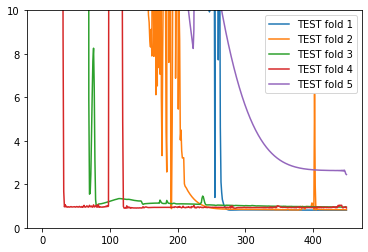

In [20]:
import matplotlib.pyplot as plt



for f in list(lr.reshape(1,)[0].keys()):

    plt.plot(lr.reshape(1,)[0][f]["valid_acc"], label = "TEST fold "+str(f+1))
    
plt.ylim(0,10)
plt.legend()
plt.show()

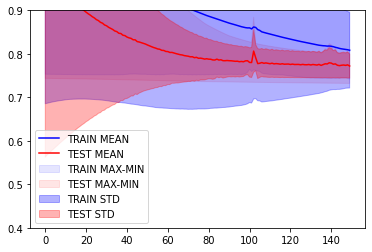

In [14]:
import matplotlib.pyplot as plt
    
init=300
plt.fill_between(x=np.arange(tt_aa[1][init:].shape[0]),y1=tt_aa[1][init:],y2=tt_aa[0][init:],color='b',alpha=0.1, label = "TRAIN MAX-MIN")
plt.fill_between(x=np.arange(tt_aa[1][init:].shape[0]),y1=vv_aa[1][init:],y2=vv_aa[0][init:],color='r',alpha=0.1, label = "TEST MAX-MIN")

plt.fill_between(x=np.arange(tt_aa[1][init:].shape[0]),y1=tt_aa[3][init:],y2=tt_aa[4][init:],color='b',alpha=0.3, label = "TRAIN STD")
plt.fill_between(x=np.arange(tt_aa[1][init:].shape[0]),y1=vv_aa[3][init:],y2=vv_aa[4][init:],color='r',alpha=0.3, label = "TEST STD")

plt.plot(tt_aa[2][init:],'b', label = "TRAIN MEAN")
plt.plot(vv_aa[2][init:],'r', label = "TEST MEAN")

plt.ylim(0.4,0.9)
plt.legend()
plt.show()

In [15]:
#(folds,epochs,classes)
flTP_v=np.vectorize(lambda lTP,i:np.array(lTP[i]['valid_acc_abs']),
             signature="(),()->(j,i)")(lTP.reshape(1,)[0],np.array(list(lTP.reshape(1,)[0].keys())))*300
flTN_v=np.vectorize(lambda lTP,i:np.array(lTP[i]['valid_acc_abs']),
             signature="(),()->(j,i)")(lTN.reshape(1,)[0],np.array(list(lTN.reshape(1,)[0].keys())))*300
flFP_v=np.vectorize(lambda lTP,i:np.array(lTP[i]['valid_acc_abs']),
             signature="(),()->(j,i)")(lFP.reshape(1,)[0],np.array(list(lFP.reshape(1,)[0].keys())))*300
flFN_v=np.vectorize(lambda lTP,i:np.array(lTP[i]['valid_acc_abs']),
             signature="(),()->(j,i)")(lFN.reshape(1,)[0],np.array(list(lFN.reshape(1,)[0].keys())))*300

In [16]:
#(folds,epochs,classes)
flTP_t=np.vectorize(lambda lTP,i:np.array(lTP[i]['train_acc_abs']),
             signature="(),()->(j,i)")(lTP.reshape(1,)[0],np.array(list(lTP.reshape(1,)[0].keys())))*300
flTN_t=np.vectorize(lambda lTP,i:np.array(lTP[i]['train_acc_abs']),
             signature="(),()->(j,i)")(lTN.reshape(1,)[0],np.array(list(lTN.reshape(1,)[0].keys())))*300
flFP_t=np.vectorize(lambda lTP,i:np.array(lTP[i]['train_acc_abs']),
             signature="(),()->(j,i)")(lFP.reshape(1,)[0],np.array(list(lFP.reshape(1,)[0].keys())))*300
flFN_t=np.vectorize(lambda lTP,i:np.array(lTP[i]['train_acc_abs']),
             signature="(),()->(j,i)")(lFN.reshape(1,)[0],np.array(list(lFN.reshape(1,)[0].keys())))*300

In [17]:
fsen_v=flTP_v/(flTP_v+flFN_v)
fspe_v=flTN_v/(flFP_v+flTN_v)
acccl_v=(flTN_v+flTP_v)/(flFP_v+flFN_v+flTN_v+flTP_v)

fsen_t=flTP_t/(flTP_t+flFN_t)
fspe_t=flTN_t/(flFP_t+flTN_t)
acccl_t=(flTN_t+flTP_t)/(flFP_t+flFN_t+flTN_t+flTP_t)

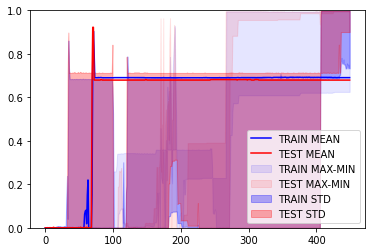

In [18]:
import matplotlib.pyplot as plt
tt_aa=fsen_t[:,:,2]
vv_aa=fsen_v[:,:,2]
    
init=0
plt.fill_between(x=np.arange(tt_aa[1][init:].shape[0]),y1=tt_aa[1][init:],y2=tt_aa[0][init:],color='b',alpha=0.1, label = "TRAIN MAX-MIN")
plt.fill_between(x=np.arange(tt_aa[1][init:].shape[0]),y1=vv_aa[1][init:],y2=vv_aa[0][init:],color='r',alpha=0.1, label = "TEST MAX-MIN")

plt.fill_between(x=np.arange(tt_aa[1][init:].shape[0]),y1=tt_aa[3][init:],y2=tt_aa[4][init:],color='b',alpha=0.3, label = "TRAIN STD")
plt.fill_between(x=np.arange(tt_aa[1][init:].shape[0]),y1=vv_aa[3][init:],y2=vv_aa[4][init:],color='r',alpha=0.3, label = "TEST STD")

plt.plot(tt_aa[2][init:],'b', label = "TRAIN MEAN")
plt.plot(vv_aa[2][init:],'r', label = "TEST MEAN")

plt.ylim(0,1)
plt.legend()
plt.show()

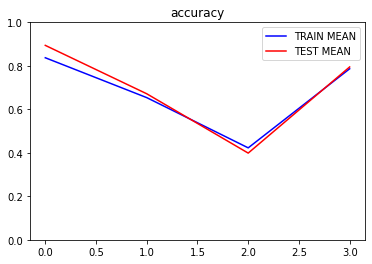

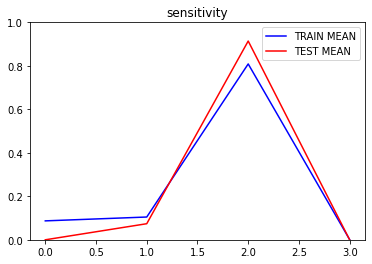

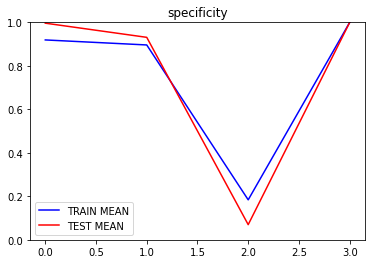

In [19]:
plt.title("accuracy")
plt.plot(np.mean(acccl_t[:,-1,:],axis=0),'b', label = "TRAIN MEAN")
plt.plot(np.mean(acccl_v[:,-1,:],axis=0),'r', label = "TEST MEAN")

plt.ylim(0,1)
plt.legend()
plt.show()

plt.title("sensitivity")
plt.plot(np.mean(fsen_t[:,-1,:],axis=0),'b', label = "TRAIN MEAN")
plt.plot(np.mean(fsen_v[:,-1,:],axis=0),'r', label = "TEST MEAN")

plt.ylim(0,1)
plt.legend()
plt.show()

plt.title("specificity")
plt.plot(np.mean(fspe_t[:,-1,:],axis=0),'b', label = "TRAIN MEAN")
plt.plot(np.mean(fspe_v[:,-1,:],axis=0),'r', label = "TEST MEAN")

plt.ylim(0,1)
plt.legend()
plt.show()

#RANGOS
#np.array([[0,6],[6,8],[8,10],[10,13],[13,25]])
#np.array([[0,2],[2,4],[4,6],[6,8],[8,10],[10,12],[12,14],[14,25]])
#np.array([[10,11],[11,12],[12,13],[13,14]])